In [1]:
import cv2
import matplotlib.pyplot as plt
import pytesseract
import numpy as np
from PIL import Image
import os
import sys
module_path = os.path.abspath(os.path.join('../python/'))
if module_path not in sys.path:
    sys.path.append(module_path)  
from OCRtext import *
%matplotlib inline

1 955- . 3350


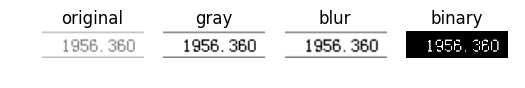

In [7]:
filename = "../../data/fund1.png"
img = cv2.imread(filename)
hist = histConstruct(img, scale=1, blurSize=9, threshold=220, showPlot=False)
linesLocation = findTexLine(hist)
lineloc = linesLocation[1]
#print(lineloc)
print(OCRTextLine(img[lineloc[0]-5:lineloc[1]+5, :], showPlots=True))  

(10, 20) 1944. 310
(26, 34) 1956. 1350
(41, 52) 57872. 810
(57, 68) 77823. 030
(73, 84) 137643. 780
(89, 100) 71813.200
(105, 116) 28066. 430
(121, 132) 85643. 890
(137, 148) 43710710
(153, 164) 26917. 400
(170, 180) 1931. 840


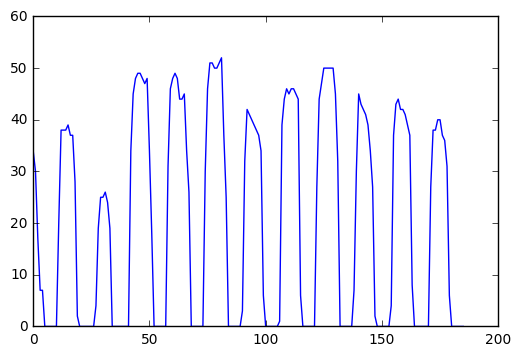

In [10]:
filename = "../../data/fund1.png"
img = cv2.imread(filename)
hist = histConstruct(img, scale=1, blurSize= 9, threshold=220, showPlot=True)
linesLocation = findTexLine(hist)
for lineloc in linesLocation:
    #print(lineloc)
    #plt.figure()
    #plt.imshow(img[lineloc[0]-4:lineloc[1]+4, :])
    #plt.axis('off')
    print(lineloc, OCRTextLine(img[lineloc[0]-4:lineloc[1]+4, :]))    
    


        

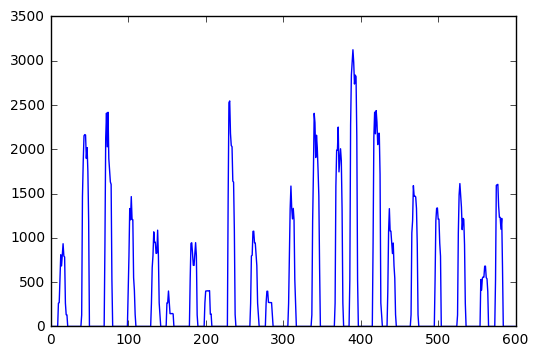

In [7]:
filename = "../../data/companyName.png"
scale = 1
connectivity = 8
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape[:2]
res = cv2.resize(gray,(scale*width, scale*height), interpolation = cv2.INTER_NEAREST)
imgres = cv2.resize(img,(scale*width, scale*height), interpolation = cv2.INTER_NEAREST)
#resRGB = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)

height, width = gray.shape[:2]
blur = cv2.GaussianBlur(res,(9,9),0)
binary_output = np.zeros_like(res)
binary_output[blur < 180] = 1
output = cv2.connectedComponentsWithStats(binary_output, connectivity, cv2.CV_32S)
contours = cv2.findContours(binary_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
binary_outputRGB = cv2.cvtColor(binary_output*255, cv2.COLOR_GRAY2BGR)
#horizontal_hist = np.sum(binary_output, axis=0)
vertical_hist = np.sum(binary_output, axis=1)
#plt.figure()
#plt.plot(horizontal_hist)
plt.figure()
plt.plot(vertical_hist)


20150616
MASIERCARD INCORPORATED
利息归聿


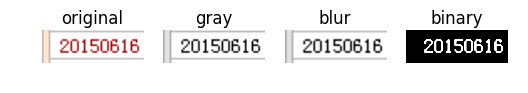

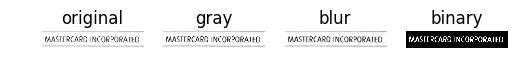

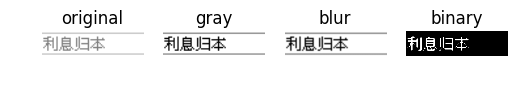

In [2]:
filename = "../../data/textlineDate.png"
img = cv2.imread(filename)
print(OCRTextLine(img, showPlots=True))
filename = "../../data/companyNameLine.png"
img = cv2.imread(filename)
print(OCRTextLine(img, showPlots=True))
filename = "../../data/textlineCH.png"
img = cv2.imread(filename)
print(OCRTextLine(img, lang='chi_sim', showPlots=True))

20150616


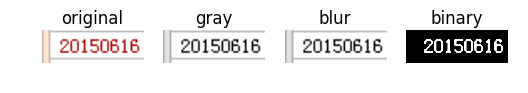

In [37]:
filename = "../../data/textlineDate.png"
baseHeight = 100.0
connectivity = 8
img = cv2.imread(filename)
height, width = img.shape[:2]
scale = baseHeight/height
newheight = int(baseHeight)
newwidth = int(scale*width)
imgres = cv2.resize(img,(newwidth, newheight), interpolation = cv2.INTER_LINEAR )
plt.figure()
plt.subplot(141)
plt.imshow(imgres)
plt.title('original')
plt.axis('off')
gray = cv2.cvtColor(imgres, cv2.COLOR_BGR2GRAY)
plt.subplot(142)
plt.imshow(gray,cmap='gray')
plt.title('gray')
plt.axis('off')
height, width = gray.shape[:2]
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.subplot(142)
plt.imshow(gray,cmap='gray')
plt.title('gray')
plt.axis('off')
binary_output = np.zeros_like(blur)
binary_output[blur < 180] = 1
plt.subplot(144)
plt.imshow(binary_output,cmap='gray')
plt.title('binary')
plt.axis('off')
img = Image.fromarray(np.uint8((binary_output)))
output = pytesseract.image_to_string(img, lang='chi_sim', boxes=False, config="-psm 7")
print(output)

[  17   18   19   22   23   23   23   23   23   24   24   24   78   79   79
   79   79   79   79   79   80   80   80   80   80   80   80   80   80  100
  138  138  138  138  138  138  138  138  138  138  139  139  139  139  139
  139  139  139  140  140  140  197  197  198  198  198  198  198  198  198
  198  198  198  198  258  258  259  259  260  260  260  260  260  297  297
  298  357  357  357  358  358  358  358  358  358  358  359  396  396  396
  455  455  455  455  455  455  455  456  456  456  456  456  456  456  456
  456  456  456  456  514  514  514  515  515  516  516  516  516  516  553
  553  554  612  612  612  612  612  612  613  613  613  613  613  614  614
  614  614  614  614  614  614  615  636  673  673  673  673  674  674  674
  674  674  674  674  674  674  675  675  675  675  675  676  732  733  733
  733  733  733  734  734  734  734  734  734  734  734  734  734  734  735
  735  735  770  770  770  770  770  770  771  771  771  771  771  771  771
  771  772  

(-0.5, 601.5, 1199.5, -0.5)

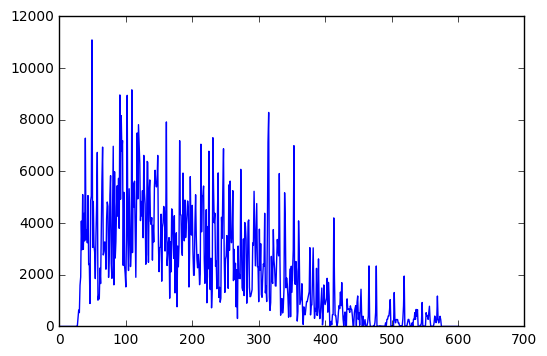

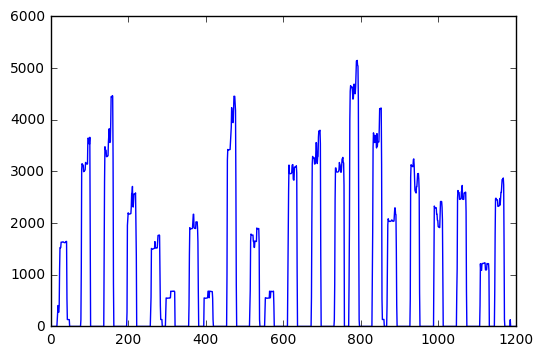

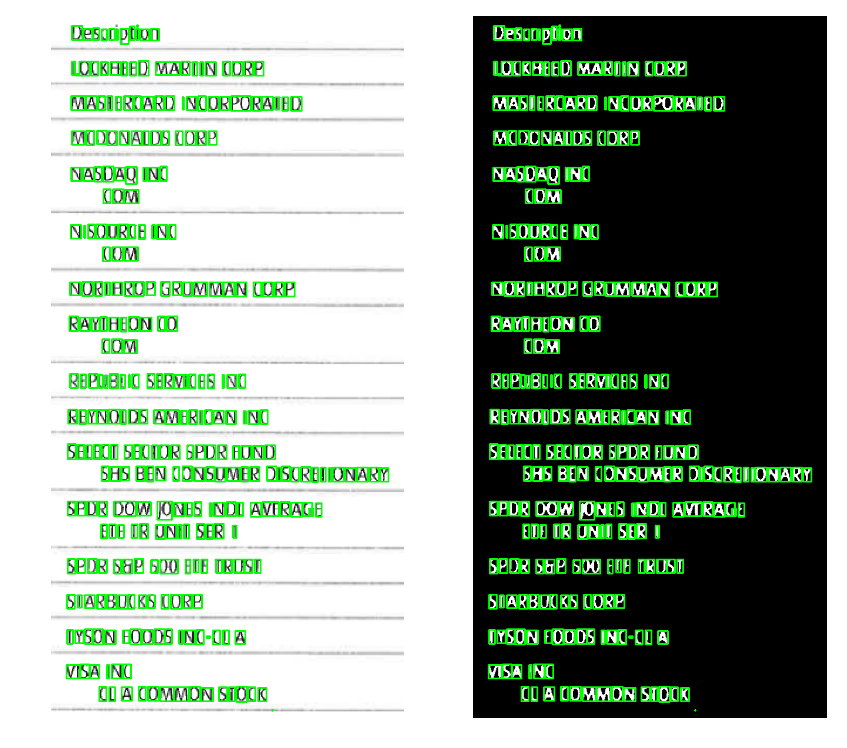

In [3]:
filename = "../../data/companyName.png"
scale = 2
connectivity = 8
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape[:2]
res = cv2.resize(gray,(scale*width, scale*height), interpolation = cv2.INTER_NEAREST)
imgres = cv2.resize(img,(scale*width, scale*height), interpolation = cv2.INTER_NEAREST)
#resRGB = cv2.cvtColor(res, cv2.COLOR_GRAY2BGR)

height, width = gray.shape[:2]
blur = cv2.GaussianBlur(res,(7,7),0)
binary_output = np.zeros_like(res)
binary_output[blur < 180] = 1
output = cv2.connectedComponentsWithStats(binary_output, connectivity, cv2.CV_32S)
contours = cv2.findContours(binary_output, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
binary_outputRGB = cv2.cvtColor(binary_output*255, cv2.COLOR_GRAY2BGR)
horizontal_hist = np.sum(binary_output, axis=0)
vertical_hist = np.sum(binary_output, axis=1)
plt.figure()
plt.plot(horizontal_hist)
plt.figure()
plt.plot(vertical_hist)
xList = []
yList = []
wList = []
hList = []
for cnt in contours[1]:
    x,y,w,h = cv2.boundingRect(cnt)
    if w < 0.5*width:
        xList.append(x)
        yList.append(y)
        wList.append(w)
        hList.append(h)

xList = np.array(xList)
yList = np.array(yList)
wList = np.array(wList)
hList = np.array(hList)

Height = np.percentile(hList, 60)

digitsIndex = np.where(abs(hList - Height) < 100)
digitXList = xList[digitsIndex]
digitYList = yList[digitsIndex]
digitWList = wList[digitsIndex]
digitHList = hList[digitsIndex]
sortList = np.argsort(digitYList)
digitXList = digitXList[sortList]
digitYList = digitYList[sortList]
digitWList = digitWList[sortList]
digitHList = digitHList[sortList]
print(digitYList)

for x, y, w, h in zip(digitXList, digitYList, digitWList, digitHList):
    cv2.rectangle(imgres,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.rectangle(binary_outputRGB,(x,y),(x+w,y+h),(0,255,0),2)
    
print(digitXList.shape)

print("Number of box  = {}".format(len(xList)))
cv2.imwrite('binary.jpg', binary_outputRGB)
cv2.imwrite('original.jpg', imgres)
plt.figure(figsize=(10, 20))
plt.subplot(121)
plt.imshow(imgres)
plt.axis('off')
plt.subplot(122)
plt.imshow(binary_outputRGB)
plt.axis('off')


In [84]:
cv2.drawContours(binary_output, contours[1], 2, (255,0,0))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

83
720


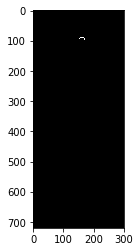

In [62]:
binary_image = np.zeros_like(res)
x, y = np.where(output[1] == 16)
print(len(x))
print(len(output[1]))
binary_image[x, y] = 1
plt.imshow(binary_image,cmap='gray')

In [4]:
filename = "fund1.png"

img = Image.open(filename)
img = img.convert('RGBA')
basewidth = int(float(img.size[0])*2)

wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
pix = img.load()
for y in range(img.size[1]):
    for x in range(img.size[0]):
        if pix[x, y][0] < 180 or pix[x, y][1] < 180 or pix[x, y][2] < 180:
            pix[x, y] = (0, 0, 0, 255)
        else:
            pix[x, y] = (255, 255, 255, 255)
imgnp = np.array(img)
gray_img = cv2.cvtColor(imgnp, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(img, boxes=True)
# os.remove('temp.jpg')
print('Number of Line {}'.format(text.count('\n')))
orig_text = text
#text = text.replace('z', '2')
#text = text.replace('u', '0')
#text = text.replace('n', '0')
#text = text.replace('x', '1')
#text = text.replace('s', '5')
#text = text.replace('q', '4')
#text = text.replace('l', '1')
#text = text.replace('a', '3')
#text = text.replace('v', '7')
print(text)
#print(orig_text)
texts = text.splitlines();
results_list = []
info_list = []
for tt in texts:
    #print(tt)
    info = tt.split(' '); 
    #print(info)
    x1 = int(info[1])-2
    y1 = int(info[2])-2
    x2 =  int(info[3])+2
    y2 =  int(info[4])+10
    info_list.append({'pred': info[0], 'box': (x1,y1,x2,y2)})
    results_list.append(gray_img[y1:y2, x1:x2])
    #cv2.rectangle(gray_img,(x1-2, y1-2),(x2+2, y2+2),(0,255,0),0)
#plt.figure
#plt.imshow(img.crop((x1,y1,x2,y2)), cmap='gray')
plt.figure(figsize=(16,16))
#print(x1,x2,y1,y2)
#result = img.crop((x1-2,y1-2,x2+2,y2+2))
plt.imshow(gray_img, cmap='gray')
plt.axis('off')



AttributeError: module 'pytesseract' has no attribute 'imshow'

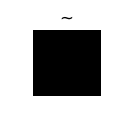

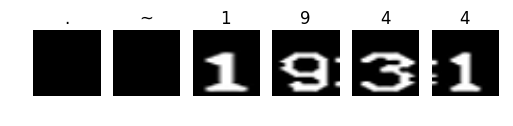

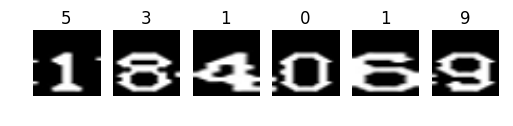

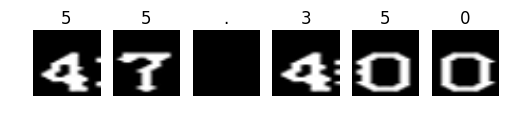

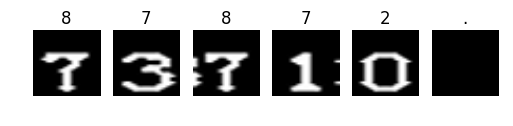

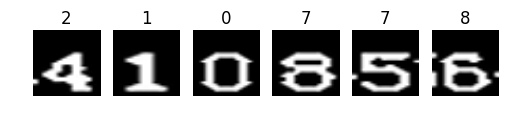

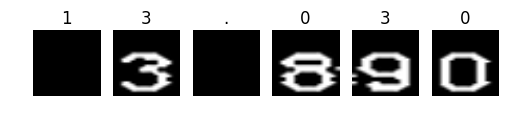

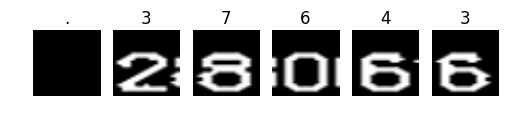

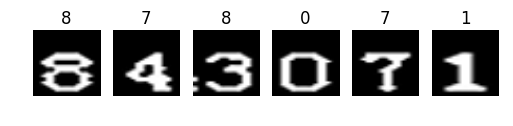

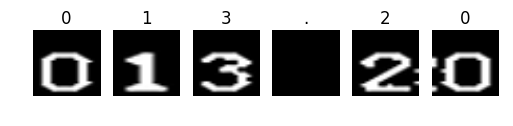

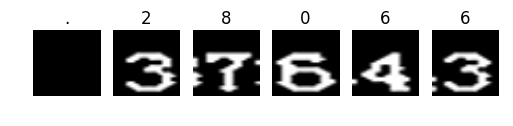

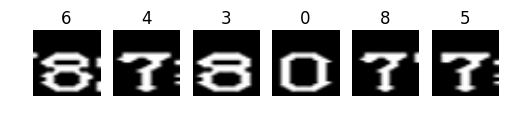

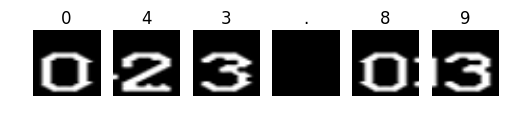

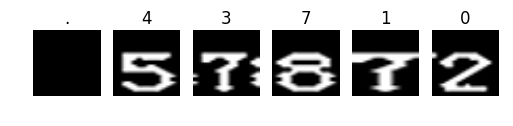

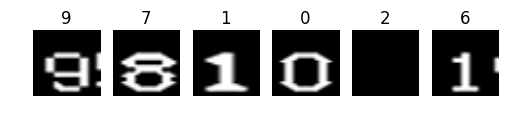

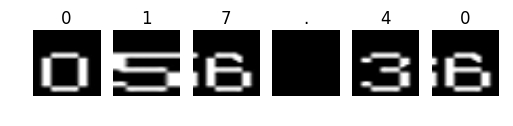

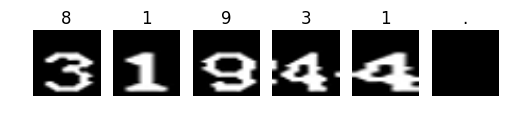

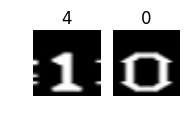

In [54]:
numOfDigits = 6
for i in range(len(results_list)):
    if i % numOfDigits is 1:
        plt.figure()
    plt.subplot(101 + numOfDigits*10 + i%numOfDigits)
    plt.imshow(cv2.resize(255- results_list[i], (32,32),  interpolation = cv2.INTER_CUBIC),cmap='gray')
    plt.title(info_list[i]['pred'])
    plt.axis('off')

In [38]:
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
im = Image.open('temp.jpg') # the second one
im = im.filter(ImageFilter.MedianFilter())
enhancer = ImageEnhance.Contrast(im)
im = enhancer.enhance(2)
im = im.convert('1')
im.save('temp2.jpg')
text = pytesseract.image_to_string(Image.open('temp2.jpg'))
print(text)

In [ ]:
filename = "/home/yong.zhang/Dropbox/OCR/notebook/ID1.png"
im = cv2.imread(filename)
im3 = im.copy()
gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),0)
thresh = cv2.adaptiveThreshold(blur,255,1,1,11,2)
contours = cv2.findContours(thresh,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

samples =  np.empty((0,100))
responses = []
keys = [i for i in range(48,58)]

for cnt in contours[1]:
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            cv2.rectangle(im,(x,y),(x+w,y+h),(0,0,255),2)
            roi = thresh[y:y+h,x:x+w]
            roismall = cv2.resize(roi,(10,10))
            cv2.imshow('norm',im)
            key = cv2.waitKey(0)

            if key == 27:  # (escape to quit)
                sys.exit()
            elif key in keys:
                responses.append(int(chr(key)))
                sample = roismall.reshape((1,100))
                samples = np.append(samples,sample,0)

responses = np.array(responses,np.float32)
responses = responses.reshape((responses.size,1))
print("training complete")

np.savetxt('generalsamples.data',samples)
np.savetxt('generalresponses.data',responses)

In [249]:
print(contours[1])

[array([[[  1, 182]]], dtype=int32), array([[[ 15, 181]],

       [[ 14, 182]],

       [[  5, 182]],

       [[ 71, 182]],

       [[ 29, 182]],

       [[ 28, 181]]], dtype=int32), array([[[ 36, 174]]], dtype=int32), array([[[ 24, 171]],

       [[ 23, 172]],

       [[ 22, 172]],

       [[ 22, 173]],

       [[ 23, 173]],

       [[ 23, 172]]], dtype=int32), array([[[ 18, 171]],

       [[ 17, 172]],

       [[ 17, 173]],

       [[ 18, 174]],

       [[ 19, 173]],

       [[ 19, 172]]], dtype=int32), array([[[ 12, 171]],

       [[ 12, 174]]], dtype=int32), array([[[ 42, 167]],

       [[ 44, 169]],

       [[ 44, 174]],

       [[ 45, 175]],

       [[ 45, 176]],

       [[ 43, 178]],

       [[ 41, 178]],

       [[ 40, 177]],

       [[ 40, 171]],

       [[ 39, 170]]], dtype=int32), array([[[ 35, 167]],

       [[ 37, 167]],

       [[ 39, 169]],

       [[ 39, 176]],

       [[ 37, 178]],

       [[ 35, 178]],

       [[ 33, 176]],

       [[ 33, 169]]], dtype=int32), array([